In [134]:
import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns

sns.set_style("whitegrid")

# Bayes 101

$$P(H_0|Data) = \frac{P(Data|H_0)P(H_0)}{P(Data)}$$

$$\frac{P(H_1|Data)}{P(H_0|Data)} = \frac{P(Data|H_1)P(H_1)}{P(Data|H_0)P(H_0)} = BayesFactor \times PriorOdss$$

# NHST 101

$$X_i \sim N(\mu, 1)$$

$$H_0: \mu = 0$$
$$H_1: \mu \neq 0$$

$$pval = P(\psi > \bar{X} | H_0)$$

$$X_i \sim N(\mu, 1)$$

$$H_0: \mu = 0$$
$$H_1: \mu = ±m$$

$$pval = P(\psi > \bar{X} | H_0)$$

# Power analysis 101

$$K(\alpha, \beta) = (\Phi^{-1}(1 - \frac{\alpha}{2}) + \Phi^{-1}(1 - \beta))^2$$

$$n = \frac{K(\alpha, \beta)}{e^2}$$

$\alpha$ - уровень значимости (FPR), $\beta$ - 1-мощность, $n$ - размер выборок, $e$ - улучшение

# 0.001 vs 0.05

$$X_i \sim N(\mu, 1)$$

$$H_0: \mu = 0$$
$$H_1: \mu = ±m$$

$$m = \frac{K(0.05, 0.1)}{\sqrt{10000}}$$

m - то, что можем затрекать на уровне 0.05 и мощностью 0.9 (типичные условия)

$$P(Data|H_0) = N(Data|0, 1)$$

$$P(Data|H_1) = \frac{N(Data|m, 1) + N(Data|m, 1)}{2}$$


$$\frac{P(H_1|Data)}{P(H_0|Data)} = \frac{N(Data|m, 1) + N(Data|m, 1)}{2N(Data|0, 1)} \times \frac{P(H_1)}{P(H_0)}$$

$$Data \rightarrow pval$$

$$Data \rightarrow \frac{P(H_1|Data)}{P(H_0|Data)}$$

$$\frac{P(H_1|Data)}{P(H_0|Data)} \leftrightarrow pval$$

In [160]:
def k(alpha, beta):
    return (scipy.stats.norm.ppf(1 - alpha / 2) + scipy.stats.norm.ppf(1 - beta))**2

m_power = k(0.05, 0.1) ** 0.5

def f_bf_power_rope(p_values):
    x_bar = scipy.stats.norm.ppf(1 - p_values / 2)
    bf_h1 = 0.5 * (scipy.stats.norm.pdf(x_bar - m_power) + scipy.stats.norm.pdf(x_bar + m_power))
    bf_h0 = scipy.stats.norm.pdf(x_bar)
    return bf_h1 / bf_h0


def f_bf_power(p_values):
    x_bar = scipy.stats.norm.ppf(1 - p_values / 2)
    bf_h1 = 0.5 * (scipy.stats.norm.pdf(x_bar - m_power) + scipy.stats.norm.pdf(x_bar + m_power))
    bf_h0 = scipy.stats.norm.pdf(x_bar)
    return bf_h1 / bf_h0

def f_bf_ll(p_values):
    x_bar = scipy.stats.norm.ppf(1 - p_values / 2)
    bf_h1 = 0.5 * (scipy.stats.norm.pdf(0) + scipy.stats.norm.pdf(0))
    bf_h0 = scipy.stats.norm.pdf(x_bar)
    return bf_h1 / bf_h0

In [187]:
def do_plot(title, prior=1):
    f, ax = plt.subplots(figsize=(7, 7), dpi=100)
    ax.set(xscale="log", yscale="log")

    p_values = np.linspace(0.001, 0.1, 10000)
    sns.lineplot(p_values, f_bf_power(p_values) * prior, ax=ax)

    x_ticks = np.array([0.001, 0.005, 0.01, 0.05, 0.1])
    y_ticks = f_bf_power(x_ticks) * prior

    ax.set_xticks(x_ticks)
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.set_xlabel('p-value')

    ax.set_yticks(y_ticks)
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

    ax.set_ylabel(title)

    plt.show()

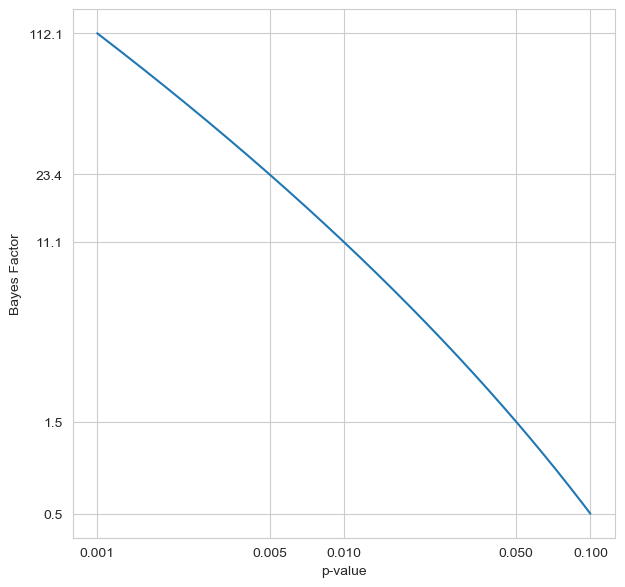

In [188]:
do_plot('Bayes Factor')

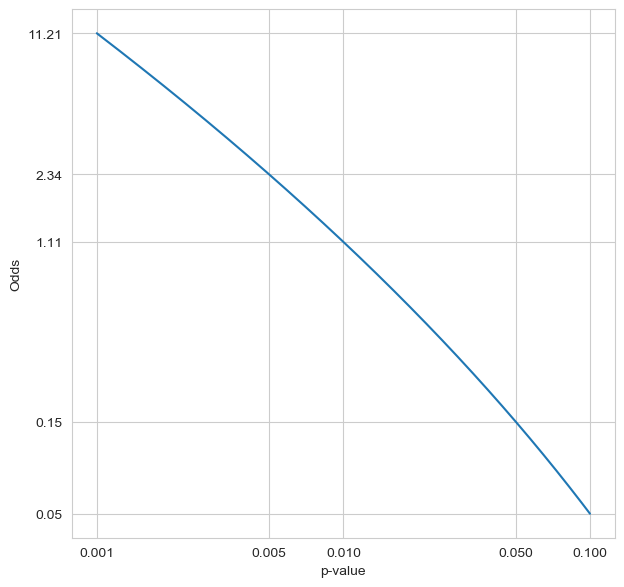

In [189]:
do_plot('Odds', 0.1)

$$n = \frac{K(\alpha, \beta)}{e^2}$$

In [180]:
k(0.001, 0.1) / k(0.05, 0.1), k(0.005, 0.1) / k(0.05, 0.1)

(1.9894411628807487, 1.59092576122042)

# BayesFactor / p-value as a function of N

In [287]:
m = 0.01
p_value = 0.001

n = np.linspace(100, 10000, 10000)
x_bar = scipy.stats.norm.ppf(1 - p_value / 2) / np.sqrt(n)
x_bar

array([0.32905267, 0.3274357 , 0.32584233, ..., 0.03290853, 0.0329069 ,
       0.03290527])

In [288]:
bf_h1 = 0.5 * (scipy.stats.norm.pdf((x_bar - m) * np.sqrt(n)) + scipy.stats.norm.pdf((x_bar + m) * np.sqrt(n)))
bf_h1

array([0.00186493, 0.0018658 , 0.00186667, ..., 0.01449165, 0.01449329,
       0.01449493])

In [289]:
bf_h0 = scipy.stats.norm.pdf(x_bar * np.sqrt(n))
bf_h1

array([0.00186493, 0.0018658 , 0.00186667, ..., 0.01449165, 0.01449329,
       0.01449493])

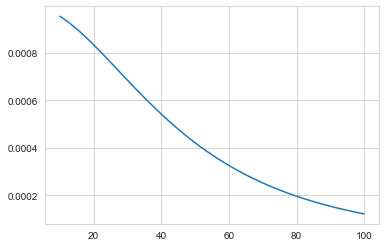

In [290]:
bf = bf_h1 / bf_h0

plt.plot(np.sqrt(n), p_value / bf)